In [1]:
"""
Zé Fonseca
19/04/2016
Simulate data of SNIa with photometric redshift uncertainties.
"""

import numpy as np
import scipy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline
import random as rand


In [2]:
#Basic cosmological functions

#inverse of Friedman equation
def invH(z,OM,w):
    return (OM*(1+z)**3+(1-OM)*(1+z)**(3*(w+1)))**(-.5)
   
c=2.99792e5

#distance modulus
def mu(z,OM,H0,w):
    if type(z)=='float' or type(z)=='int':
        return 5*np.log10((1+z)/H0*c*quad(invH,0,z,args=(OM,w))[0])+25
    else:
        dl=[]
        for i in range(len(z)):
            dl.append(quad(invH,0,z[i],args=(OM,w))[0])
        return 5*np.log10(np.array(dl)*(1+z)*c/H0)+25

#fiducial cosmology
OM=0.31
H0=67.74
w=-1

#supernova redshift distribituon
def prior_gal(z):
    return z*np.exp(-3*z)

def randSN(beta):
    zmin = 0.015
    zmax = 1.4
    Y=1
    X=0
    while Y>X:
        RN0 = zmin+(zmax-zmin)*rand.random()
        X = RN0*np.exp(-beta*RN0)
        Y = rand.random()
    return RN0

#simulate the redshift of 998 supernova for the Arabian nights
N=998
z=np.zeros(N)
for i in range(N):
    z[i]=randSN(3)
z.sort()
sig_mu=0.2*np.ones(N)
mt=mu(z,OM,H0,w)
mu_o=mt+np.random.randn(N)*sig_mu
sig_z_per_ph=0.04
zobs=z+np.random.randn(N)*sig_z_per_ph*(1+z)

#ensure that the simulated redshift is always bigger than 0
index=np.argwhere(zobs<=0)
while len(index)>0:
    zobs[list(index[:,0])]=z[list(index[:,0])]+np.random.randn(len(index))*sig_z_per_ph*(1+z[list(index[:,0])])
    index=np.argwhere(zobs<=0)

sig_z=0.04*(1+zobs)



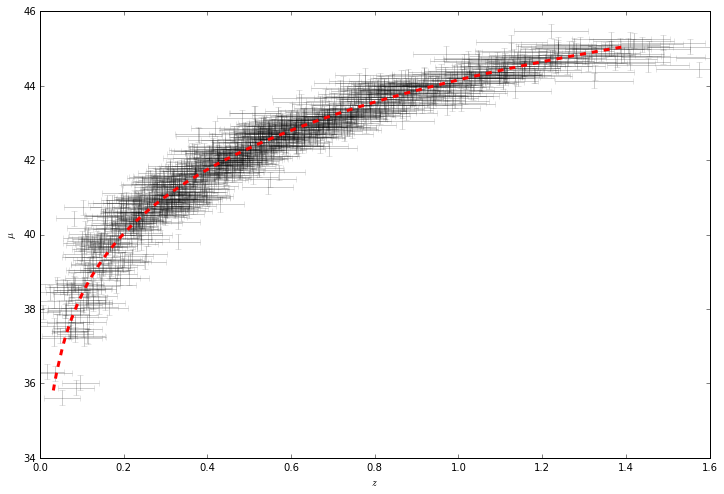

In [5]:
#example plot
plt.figure(figsize=(12,8))

plt.errorbar(zobs,mu_o,yerr=[sig_mu,sig_mu],xerr=[sig_z,sig_z],marker='',ls='',color='k',alpha=0.2)
plt.plot(z,mt,'--r',lw=3)
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.xlim([0,1.6])
plt.show()

In [4]:
#Save data
np.savetxt('dataset_photozcase.txt',np.c_[z,zobs,mu_o],fmt='%2.3f',\
           header='\n'.join(["Photo-z error: %.2f *(1+z)" %0.04,"Error in mu %.2f" %0.2,\
                             "z_true z_obs mu_obs"]))